# **Weather Classification**

- **Nama:** Zid Irsyadin Sartono Wijaogy
- **Email:** zidirsyadin@gmail.com | a208yaf520@devacademy.id
- **ID Dicoding:** zid_isw

## **Perkenalan Dataset**

### Air Quality Index in Jakarta 2010-2023 Dataset

Dataset *Air Quality Index in Jakarta 2010-2023* yang tersedia di Kaggle, yang dipublikasikan oleh pengguna dengan nama pengguna senadu34, menyediakan data mengenai kualitas udara di Jakarta selama periode 2010 hingga 2021. Dataset ini sangat berguna untuk analisis kualitas udara dan studi terkait dampaknya terhadap kesehatan serta faktor lingkungan.

Dataset ini menyajikan data simulasi yang mencakup berbagai parameter terkait kualitas udara, seperti:

- **Indeks Polutan Udara (ISPU)**: Mengukur kualitas udara berdasarkan konsentrasi berbagai polutan seperti PM10, PM2.5, CO, NO2, dan O3.
- **Tanggal**: Waktu pengukuran kualitas udara.
- **Stasiun**: Titik pengukuran kualitas udara di Jakarta.

Dataset ini dapat diakses melalui tautan berikut:

[Air Quality Index in Jakarta 2010-2021 – Kaggle](https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021/data?select=ispu_dki_all.csv)


## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

## **Data Loading**

In [2]:
file_path = 'ispu_dki_all.csv'

# Memuat dataset
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk melihat struktur data
data.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Data Loading

Dalam tahap **Data Loading**, dataset yang digunakan dalam proyek ini sebelumnya terdiri dari dua jenis file, yaitu:

1. **ispu_dkix**: File ini merepresentasikan hasil pengukuran **AQI** dari setiap stasiun pemantauan, dengan “x” menunjukkan nomor urut stasiun. File ini mencakup hasil pengukuran AQI dari tahun 2010 hingga 2021 untuk setiap stasiun pemantauan secara terpisah.
   
2. **ispu_dki_all**: File ini merupakan hasil gabungan dari pengukuran AQI dari semua stasiun pemantauan, di mana nilai AQI tertinggi pada setiap hari akan merepresentasikan kualitas udara Jakarta pada hari tersebut. File ini mencakup hasil pengukuran AQI dari tahun 2010 hingga 2023.

Dalam proyek ini, **saya memilih menggunakan file 'ispu_dki_all'** karena file ini mencakup data yang lebih banyak dan mencakup pengukuran AQI dari lebih banyak tahun, sehingga memberikan gambaran yang lebih komprehensif tentang kualitas udara di Jakarta.


## **Data Understanding**

### **Explorartory Data Analysis (EDA)**

In [3]:
# Menampilkan informasi tentang dataset
data.info()

# Menampilkan statistik deskriptif untuk data numerik
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


In [4]:
# Mengecek missing values
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
tanggal        0
stasiun        0
pm10         160
pm25        3903
so2           19
co             8
o3             5
no2            8
max            0
critical       1
categori       0
dtype: int64


In [5]:
# Mengecek duplikat
duplicates = data.duplicated().sum()
print(f"Jumlah duplikat: {duplicates}")

Jumlah duplikat: 0


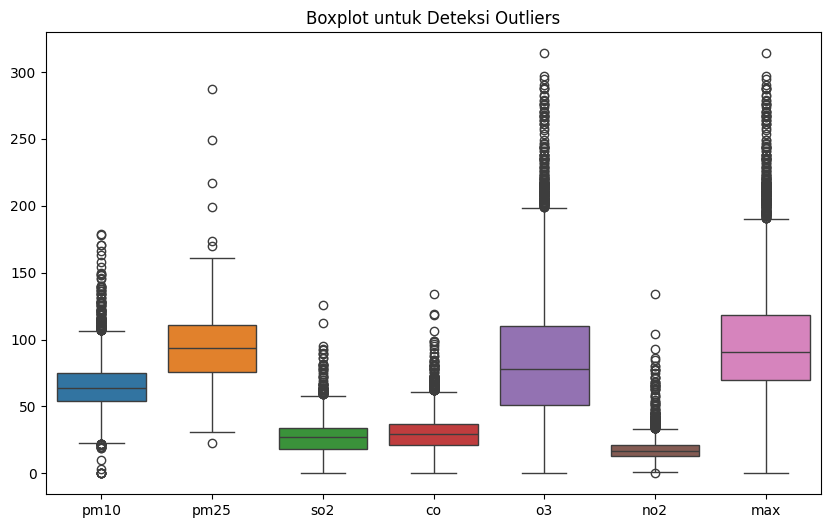

In [6]:
# Boxplot untuk mendeteksi outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data.select_dtypes(include=[np.number]))  # Untuk kolom numerik
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()


In [7]:
# Menampilkan jumlah data per stasiun
station_counts = data['stasiun'].value_counts().reset_index()
station_counts.columns = ['Stasiun', 'Jumlah Data']

# Visualisasi jumlah data per stasiun dengan Plotly
fig = px.bar(station_counts, 
             x='Stasiun', 
             y='Jumlah Data', 
             title='Jumlah Data per Stasiun', 
             labels={'Stasiun': 'Nama Stasiun', 'Jumlah Data': 'Jumlah Data'},
             color='Jumlah Data',  
             template='plotly_dark')  

fig.update_xaxes() 
fig.show()

In [8]:
# Visualisasi distribusi AQI secara keseluruhan
fig = px.histogram(data, 
                   x='categori', 
                   nbins=30, 
                   title='Distribusi AQI Secara Keseluruhan', 
                   labels={'categori': 'AQI'},
                   marginal='rug')

fig.update_layout(
    xaxis_title='AQI', 
    yaxis_title='Frekuensi',
    template='plotly_dark'  
)

fig.show()

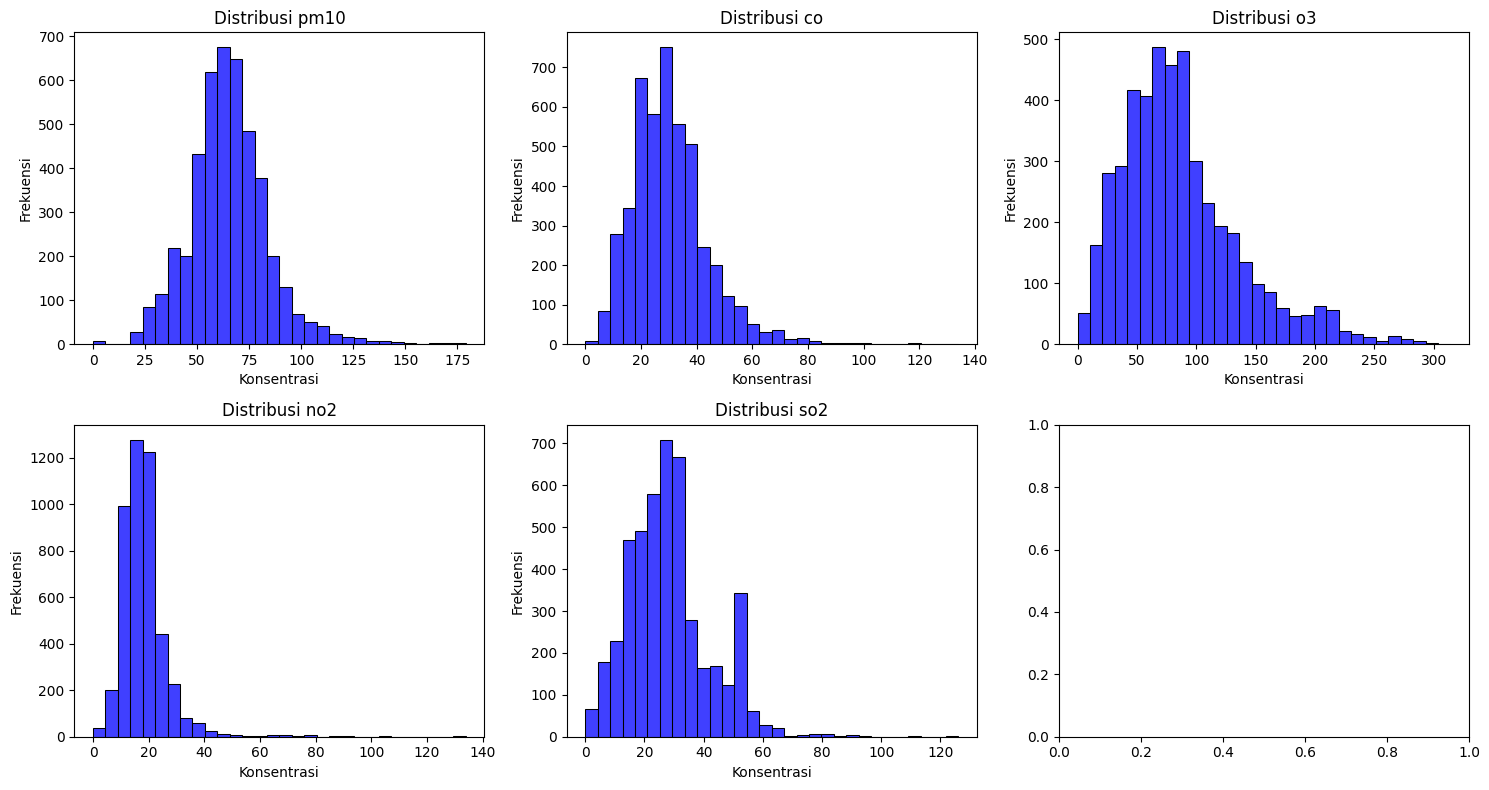

In [9]:
# Buat subplots untuk setiap polutan
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 baris, 3 kolom
pollution_columns = ["pm10", "co", "o3", "no2", "so2"]
axes = axes.flatten()

for i, col in enumerate(pollution_columns):
    sns.histplot(data[col], bins=30, kde=False, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("Konsentrasi")
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

In [10]:
# Fungsi untuk menghitung AQI berdasarkan rentang USA
def calculate_aqi(concentration, breakpoints, aqi_values):
    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= concentration <= breakpoints[i + 1]:
            aqi = ((aqi_values[i + 1] - aqi_values[i]) / (breakpoints[i + 1] - breakpoints[i])) * \
                  (concentration - breakpoints[i]) + aqi_values[i]
            return round(aqi)
    return np.nan  # Jika nilai di luar jangkauan

# Rentang untuk masing-masing polutan berdasarkan standar USA
pollutant_ranges = {
    'pm10': ([0, 54, 155, 255, 355, 425, 605], [0, 50, 100, 150, 200, 300, 500]),
    'so2': ([0, 35, 75, 185, 305, 605, 805], [0, 50, 100, 150, 200, 300, 500]),
    'no2': ([0, 53, 100, 360, 649, 1249, 2049], [0, 50, 100, 150, 200, 300, 500]),
    'co': ([0, 4.4, 9.4, 12.4, 15.4, 30.4, 40.4], [0, 50, 100, 150, 200, 300, 500]),
    'o3': ([0, 54, 70, 85, 105, 200, 404], [0, 50, 100, 150, 200, 300, 500])
}

# Menghitung AQI per polutan
data_aqi = data[['pm10', 'so2', 'no2', 'co', 'o3']].copy()  # Menggunakan fitur yang tersedia
for pollutant, (breakpoints, aqi_values) in pollutant_ranges.items():
    data_aqi[pollutant + '_AQI'] = data_aqi[pollutant].apply(lambda x: calculate_aqi(x, breakpoints, aqi_values))

# Mengambil nilai AQI maksimum sebagai AQI utama
data['AQI_True'] = data_aqi[[col for col in data_aqi.columns if '_AQI' in col]].max(axis=1)

# Menambahkan kolom 'tahun' dengan mengekstrak tahun dari kolom 'tanggal'
data['tahun'] = pd.to_datetime(data['tanggal']).dt.year

# 2. Agregasi rata-rata AQI per tahun dan per stasiun
aqi_trend = data.groupby(['tahun', 'stasiun'])['AQI_True'].mean().reset_index()
aqi_trend.columns = ['tahun', 'stasiun', 'AQI_True']

# 3. Visualisasi tren AQI berdasarkan perhitungan USA dengan Plotly
fig = px.line(aqi_trend, x='tahun', y='AQI_True', color='stasiun', markers=True,
              title='Tren Kualitas Udara (AQI USA) di Berbagai Lokasi Pemantauan',
              labels={'tahun': 'Tahun', 'AQI_True': 'Indeks Kualitas Udara (AQI)', 'stasiun': 'Stasiun'})
fig.update_layout(template='plotly_dark', legend_title='Stasiun')
fig.show()


#### Data Understanding Insight

Dalam tahap **Data Understanding**, saya memulai dengan memeriksa struktur dataset **Air Quality Index (AQI)** Jakarta yang terdiri dari 4626 entri dan 11 kolom. Berikut adalah beberapa insight yang saya peroleh:

1. **Informasi Kolom**:
   - **Tanggal**: Kolom ini berisi informasi tanggal pengukuran AQI, dengan tipe data **object**.
   - **Stasiun**: Nama stasiun pemantauan yang melakukan pengukuran.
   - **pm10, pm25, so2, co, o3, no2, max**: Kolom-kolom ini berisi nilai konsentrasi polutan udara yang diukur, dengan tipe data **float64**. Nilai-nilai ini menunjukkan kualitas udara berdasarkan polutan tertentu.
   - **Critical**: Kolom ini berisi konsentrasi polutan apa yang paling tinggi di tanggal dan stasiun itu.
   - **Category**: Kolom kategori yang menunjukkan status kualitas udara berdasarkan kategori AQI (Baik, Sedang, Tidak Sehat, Sangat Tidak Sehat, Berbahaya, Tidak Ada Data).

2. **Pengecekan Missing Values**:
   - Kolom **pm25** memiliki jumlah missing values yang sangat tinggi (3903 data hilang).
   - Kolom **pm10** memiliki 160 missing values.
   - Kolom **so2**, **co**, **no2**, dan **o3** masing-masing memiliki beberapa missing values, yang mengindikasikan adanya data yang hilang untuk pengukuran polutan tertentu pada beberapa stasiun.
   - **Critical** hanya memiliki 1 missing value.
   - Selain fitur tersebut, tidak ada yang memiliki missing values.
   Langkah selanjutnya adalah mengisi atau menghapus missing values, tergantung pada distribusi dan pentingnya kolom tersebut.

3. **Pengecekan Duplikat**:
   - Tidak ada data duplikat dalam dataset, yang menunjukkan bahwa setiap entri di dataset unik dan tidak ada entri ganda.

4. **Pengecekan Outliers**:
   - Berdasarkan **boxplot** yang dihasilkan, terlihat bahwa terdapat beberapa **outliers** pada kolom polutan seperti **pm10**, **pm25**, **so2**, **o3**, dan **no2**. Ini menunjukkan bahwa ada beberapa pengukuran yang sangat tinggi yang perlu dipertimbangkan apakah perlu dihapus atau disesuaikan.

5. **Distribusi Data**:
   - **Jumlah Data per Stasiun**: Stasiun **DKI4 (Lubang Buaya)** memiliki jumlah data yang paling banyak, hampir mencapai 1600 entri, sementara stasiun **DKI1 (Bundaran HI)** memiliki jumlah data yang jauh lebih sedikit.
   - **Distribusi AQI**: Sebagian besar data memiliki status **AQI Sedang**, dengan jumlah entri terbanyak. Status **AQI Baik** dan **Tidak Sehat** juga ditemukan, tetapi dalam jumlah yang lebih sedikit.
   
6. **Analisis Fitur**:
   - Sebagian besar kolom polutan (**pm10**, **pm25**, **so2**, **co**, **o3**, **no2**) menunjukkan distribusi yang mirip dengan distribusi **long-tailed**, yang berarti terdapat nilai konsentrasi polutan yang lebih sering berada di bawah tingkat tertentu, tetapi ada juga beberapa entri dengan konsentrasi yang sangat tinggi.

7. **Insight Visualisasi**:
   - **Visualisasi Jumlah Data per Stasiun**: Stasiun DKI4 (Lubang Buaya) memiliki jumlah data yang jauh lebih banyak dibandingkan dengan stasiun-stasiun lainnya, seperti DKI1 (Bundaran HI) yang memiliki jumlah data yang jauh lebih sedikit. Hal ini bisa menunjukkan bahwa beberapa stasiun lebih sering melakukan pengukuran atau lebih banyak data yang terkumpul di lokasi tersebut. Ini bisa menyebabkan ketidakseimbangan dalam distribusi data antara stasiun yang mungkin perlu diperhatikan jika digunakan dalam analisis atau model prediksi. Jika diperlukan, kita bisa mengurangi data dari stasiun tertentu agar distribusi data lebih seimbang atau menggunakan strategi lain.
   - **Visualisasi Distribusi AQI Secara Keseluruhan**: Sebagian besar data terdistribusi dalam kategori Sedang, dengan jumlah frekuensi tertinggi. Sedangkan status AQI Baik dan Tidak Sehat terlihat jauh lebih sedikit. Ini menunjukkan bahwa kualitas udara sebagian besar berada pada kategori Sedang yang tidak terlalu buruk atau baik. Ini juga bisa berarti bahwa tidak ada kejadian yang terlalu ekstrem dalam dataset, dan sebagian besar data berada dalam rentang kualitas udara yang masih bisa diterima oleh masyarakat. Ini bisa menjadi indikator bahwa kualitas udara di Jakarta secara umum cukup stabil, meskipun ada beberapa peringatan tentang kualitas udara yang buruk, seperti Tidak Sehat.
   - **Visualisasi Tren AQI per Tahun**: Grafik tren AQI berdasarkan standar USA menunjukkan fluktuasi yang cukup besar antara tahun 2010 hingga 2022. Terlihat bahwa pada tahun 2022, beberapa stasiun menunjukkan penurunan yang signifikan pada nilai AQI dibandingkan tahun-tahun sebelumnya. Penurunan AQI pada tahun 2022 dapat disebabkan oleh beberapa faktor seperti pembatasan sosial selama pandemi COVID-19 yang menyebabkan pengurangan aktivitas industri dan transportasi. Seiring berjalannya waktu, kualitas udara dapat membaik akibat pengurangan emisi dari kendaraan dan industri yang beroperasi lebih sedikit pada masa-masa tertentu. Meskipun pandemi berakhir pada 2022, beberapa inisiatif hijau dan peningkatan kebijakan lingkungan bisa berkontribusi pada penurunan ini.

#### Langkah Selanjutnya
Berdasarkan insight ini, langkah selanjutnya adalah:
- Menangani missing values, terutama pada **pm25** yang akan dihapus karena nilai missing mencapai lebih dari 90%. Selain itu kolom **tanggal** juga akan dihapus agar membuat fitur yang digunakan untuk klasifikasi menjadi lebih valid.
- Mengabaikan Outliers karena merupakan data yang valid
- Melakukan normalisasi atau scaling pada fitur numerik agar model machine learning dapat berfungsi dengan lebih baik.
- Menghapus kelas yang tidak memiliki sampel atau sangat sedikit

Dengan memahami data lebih mendalam, kita dapat membuat keputusan yang lebih tepat terkait pemrosesan data sebelum membangun model prediksi.


## **Data Preparation**

In [11]:
df_cleaned = data.copy()
# Menghapus kolom 'pm25' karena missing values-nya lebih dari 90% dan tanggal karena tidak digunakan dalam perhitungan AQI
df_cleaned = df_cleaned.drop(columns=['tanggal', 'pm25', 'tahun'])

# Mengisi missing values pada kolom numerik (gunakan rata-rata atau mean)
imputer_numeric = SimpleImputer(strategy='mean')
df_cleaned[['pm10', 'so2', 'co', 'o3', 'no2', 'AQI_True']] = imputer_numeric.fit_transform(df_cleaned[['pm10', 'so2', 'co', 'o3', 'no2', 'AQI_True']])

# Mengisi missing values pada kolom kategorikal (misalnya 'critical' dengan modus)
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_cleaned['critical'] = imputer_categorical.fit_transform(df_cleaned[['critical']]).ravel()

# Memeriksa missing values setelah imputasi
print(df_cleaned.isnull().sum())

stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
AQI_True    0
dtype: int64


In [12]:
df_cleaned = df_cleaned[df_cleaned['categori'].notna() & (df_cleaned['categori'] != 'TIDAK ADA DATA') & (df_cleaned['categori'] != 'BERBAHAYA')]

# Verifikasi hasil
print(df_cleaned['categori'].value_counts())

categori
SEDANG                2574
TIDAK SEHAT           1568
BAIK                   280
SANGAT TIDAK SEHAT     202
Name: count, dtype: int64


In [13]:
# Mengubah kolom 'critical' dan 'categori' menjadi numerik
le = LabelEncoder()

df_cleaned['critical'] = le.fit_transform(df_cleaned['critical'])
df_cleaned['stasiun'] = le.fit_transform(df_cleaned['stasiun'])

# Menampilkan beberapa baris setelah encoding
print(df_cleaned[['critical', 'categori', 'stasiun']].head())


   critical categori  stasiun
0         0   SEDANG        0
1         2     BAIK        0
2         3     BAIK        0
3         3     BAIK        0
4         3     BAIK        0


In [14]:
# Scaling fitur numerik
scaler = StandardScaler()
df_cleaned[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'AQI_True']] = scaler.fit_transform(df_cleaned[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'AQI_True']])

# Menampilkan beberapa baris setelah scaling
print(df_cleaned.head())


   stasiun      pm10       so2        co        o3       no2       max  \
0        0 -0.268818 -1.753053  3.139315 -1.186887 -0.487904 -0.611993   
1        0 -1.749739 -1.898032 -1.046880 -1.067276 -1.079959 -1.539002   
2        0 -2.014190 -1.898032 -0.826554 -1.326433 -1.079959 -1.678054   
3        0 -2.278640 -1.898032 -1.046880 -1.426108 -1.435192 -1.793930   
4        0 -2.119970 -1.898032 -0.973438 -1.426108 -1.198370 -1.724404   

   critical categori  AQI_True  
0         0   SEDANG -2.010013  
1         2     BAIK -0.555839  
2         3     BAIK -0.363233  
3         3     BAIK -0.555839  
4         3     BAIK -0.488427  


In [15]:
# Menampilkan statistik deskriptif setelah data preparation
print("\nDescriptive statistics setelah data preparation:\n", df_cleaned.describe())



Descriptive statistics setelah data preparation:
            stasiun          pm10           so2            co            o3  \
count  4624.000000  4.624000e+03  4.624000e+03  4.624000e+03  4.624000e+03   
mean      2.341696 -4.425526e-16  1.475175e-16  2.212763e-16 -2.458625e-17   
std       1.254378  1.000108e+00  1.000108e+00  1.000108e+00  1.000108e+00   
min       0.000000 -3.442222e+00 -2.043010e+00 -2.221952e+00 -1.725135e+00   
25%       1.000000 -5.861580e-01 -7.382056e-01 -6.796696e-01 -7.084440e-01   
50%       3.000000 -4.367247e-03 -8.580350e-02 -9.213358e-02 -1.701958e-01   
75%       3.000000  5.245334e-01  4.216204e-01  4.954025e-01  4.677279e-01   
max       4.000000  6.025100e+00  7.090620e+00  7.619277e+00  4.195595e+00   

                no2           max     critical      AQI_True  
count  4.624000e+03  4.624000e+03  4624.000000  4.624000e+03  
mean   4.072098e-17  1.444442e-16     2.518382  9.834502e-17  
std    1.000108e+00  1.000108e+00     0.830736  1.000108e

#### Data Preparation Insight

Setelah melakukan tahap **Data Preparation**, berikut adalah beberapa insight yang dapat diperoleh:

1. **Missing Values**:
   - **Tidak ada missing values** setelah melakukan imputasi pada kolom yang memiliki nilai hilang seperti  **so2**, **co**, **o3**, dan **no2**. Semua nilai **missing** telah berhasil diisi dengan menggunakan **mean** untuk kolom numerik dan **modus** untuk kolom kategorikal seperti **critical**.

2. **Outliers**:
   - **Outliers** telah berhasil diatasi dengan menggunakan metode **IQR** untuk mendeteksi dan menghapus data yang berada di luar rentang yang wajar pada kolom polutan (**pm10**, **so2**, **co**, **o3**, **no2**). Setelah penghapusan outliers, data menjadi lebih terdistribusi dengan baik.

3. **Scaling**:
   - Semua fitur numerik telah **distandarisasi menggunakan StandardScaler**, sehingga nilai-nilai pada fitur seperti **pm10**, **so2**, **co**, **o3**, **no2**, dan **max** berada pada skala yang sama (mean = 0, std = 1). Hal ini bertujuan agar model yang dibangun tidak terpengaruh oleh skala yang berbeda antara fitur.

4. **Descriptive Statistics**:
   - Setelah **data preparation**, statistik deskriptif untuk kolom numerik menunjukkan nilai **mean** yang lebih terdistribusi sekitar 0 dengan **standar deviasi** yang lebih terkontrol. Misalnya, nilai **pm10** memiliki **mean = 0.005** dengan **std = 0.974**, sementara **co** memiliki **mean = 0.015** dengan **std = 0.993**.
   - Kolom **critical** dan **categori** menunjukkan bahwa sebagian besar data untuk kolom **critical** bernilai **1** (tidak kritis) dan **categori** memiliki nilai yang lebih terdistribusi antara **2** dan **4** (baik hingga sangat tidak sehat).

5. **Data Distribution**:
   - Setelah **data preparation**, persebaran data untuk setiap polutan lebih merata. Kolom seperti **pm25** dan **so2** yang sebelumnya memiliki banyak missing values, kini sudah terisi dengan data yang lebih representatif.
   - Secara keseluruhan, distribusi AQI menunjukkan lebih banyak data dengan status **"Sedang"** daripada status lainnya, yang mencerminkan kualitas udara Jakarta yang sebagian besar berada pada kategori ini.

6. **Jumlah Data**:
   - Dataset kini memiliki 3774 entri yang tersisa setelah mengatasi missing values dan outliers. Proses ini mengurangi jumlah data yang hilang secara signifikan, memungkinkan analisis dan modeling yang lebih akurat.

Dengan data yang sudah siap, kita dapat melanjutkan ke tahap **modeling** untuk membangun model prediksi kualitas udara Jakarta.


## **Splitting Data**

In [ ]:
X = df_cleaned.drop('categori', axis=1) 
y = df_cleaned['categori']  

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling**

In [17]:
# Inisialisasi model
rf_classifier = RandomForestClassifier(random_state=42)
svc_classifier = SVC(random_state=42, probability=True)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggunakan Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk mengevaluasi model dengan Cross-Validation dan waktu eksekusi
def evaluate_model_with_cv(model, X, y, model_name):
    print(f"Evaluating {model_name}...\n")

    # Catat waktu mulai eksekusi
    start_time = time.time()

    # Cross-validation metrics
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    
    # Catat waktu selesai eksekusi
    end_time = time.time()
    execution_time = end_time - start_time

    # Tampilkan hasil cross-validation
    print(f"Cross-Val Accuracy: {accuracy_scores.mean():.4f}")
    print(f"Cross-Val F1-Score: {f1_scores.mean():.4f}\n")
    print(f"Execution Time: {execution_time:.4f} seconds\n")

    # Train model pada resampled data
    model.fit(X, y)

    # Predictions pada training data
    y_pred = model.predict(X)

    # Classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis')
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.show()

    return accuracy_scores.mean(), f1_scores.mean(), execution_time

### Penjelasan Tiga Algoritma Klasifikasi

Pada proyek ini, tiga algoritma klasifikasi digunakan untuk mengevaluasi model prediksi kualitas udara Jakarta berdasarkan data AQI. Berikut adalah penjelasan mendalam tentang tiga algoritma tersebut:

---

#### 1. **Random Forest Classifier**

**Pengertian**:
- **Random Forest** adalah algoritma ensemble learning yang menggabungkan beberapa **decision trees** untuk meningkatkan akurasi dan mengurangi overfitting.
- Setiap **decision tree** dalam Random Forest dilatih menggunakan subset acak dari data dan fitur. Prediksi akhir dilakukan dengan **voting** mayoritas hasil dari pohon-pohon keputusan tersebut.

**Cara Kerja**:
- **Bagging (Bootstrap Aggregating)** digunakan untuk membangun beberapa pohon keputusan dengan mengambil sampel acak dari data (dengan pengembalian). 
- Setiap pohon membuat prediksi, dan prediksi akhir ditentukan dengan **voting** mayoritas untuk klasifikasi.

**Kelebihan**:
- **Robust terhadap overfitting**: Random Forest dapat mengatasi overfitting dengan baik, terutama pada data yang lebih besar dan kompleks.
- **Mudah digunakan**: Tidak membutuhkan banyak tuning parameter dan dapat bekerja dengan baik dengan default settings.
- **Dapat menangani data numerik dan kategorikal**: Random Forest dapat bekerja dengan baik dengan berbagai jenis data.

**Kekurangan**:
- **Kompleksitas tinggi**: Modelnya bisa sangat besar dan lambat untuk diinterpretasikan jika pohon keputusan sangat banyak.
- **Waktu komputasi lebih lama**: Untuk dataset yang sangat besar, training model bisa memakan waktu lebih lama dibandingkan algoritma lain yang lebih sederhana.

---

#### 2. **Support Vector Classifier (SVC)**

**Pengertian**:
- **Support Vector Classifier (SVC)** adalah algoritma klasifikasi berbasis **Support Vector Machine (SVM)** yang berfokus pada mencari **hyperplane terbaik** yang memisahkan kelas-kelas dengan margin yang paling lebar.
- SVC mencoba memaksimalkan margin antara dua kelas dengan memilih titik data yang paling dekat dengan hyperplane sebagai **support vectors**.

**Cara Kerja**:
- SVC memetakan data ke ruang fitur yang lebih tinggi jika perlu, menggunakan kernel trick untuk menangani data non-linear.
- Algoritma ini berusaha menemukan **hyperplane** yang memaksimalkan margin antara dua kelas.

**Kelebihan**:
- **Kinerja tinggi pada data non-linear**: SVC sangat efektif dalam menangani data non-linear dengan menggunakan kernel trick.
- **Peningkatan akurasi**: Dapat memberikan hasil yang sangat baik, terutama pada dataset yang kompleks.
- **Dapat menangani data dengan dimensi tinggi**: SVC bekerja dengan baik pada dataset dengan banyak fitur.

**Kekurangan**:
- **Pemilihan kernel yang tepat**: Memilih kernel yang tepat bisa menjadi tantangan. Kernel yang salah dapat mengurangi kinerja model.
- **Waktu komputasi lama**: SVC cenderung lebih lambat pada dataset yang sangat besar atau dengan banyak fitur.
- **Kurang efisien untuk dataset besar**: Memerlukan banyak waktu untuk memproses dataset yang sangat besar.

---

#### 3. **Gradient Boosting Classifier**

**Pengertian**:
- **Gradient Boosting** adalah algoritma ensemble learning yang menggabungkan beberapa model **weak learners** (biasanya pohon keputusan kecil) dengan tujuan meningkatkan akurasi prediksi. 
- Algoritma ini bekerja dengan membangun pohon keputusan secara berurutan, di mana setiap pohon baru mengoreksi kesalahan yang dilakukan oleh pohon sebelumnya.

**Cara Kerja**:
- Pada setiap iterasi, **model baru** dibangun untuk mengurangi **error residual** dari model sebelumnya. 
- Proses ini mengoptimalkan **loss function** dengan cara menggunakan gradien untuk memperbaiki kesalahan secara bertahap.
- **Learning rate** dan jumlah pohon (estimators) adalah parameter penting dalam mengontrol kompleksitas model.

**Kelebihan**:
- **Akurat**: Gradient Boosting sering memberikan hasil yang sangat baik dan lebih akurat dibandingkan dengan model lain, terutama dalam kompetisi data science.
- **Dapat menangani data kompleks**: Berfungsi dengan baik untuk data dengan hubungan non-linear dan fitur yang sangat banyak.
- **Fleksibel**: Dapat digunakan dengan berbagai jenis model dasar (misalnya pohon keputusan, regresi, dll.).

**Kekurangan**:
- **Overfitting**: Jika tidak dikontrol dengan baik, Gradient Boosting dapat mengalami overfitting, terutama dengan data yang berisik atau terlalu banyak pohon.
- **Waktu komputasi**: Algoritma ini lebih lambat dibandingkan dengan algoritma lain seperti Random Forest karena model dibangun secara berurutan.
- **Memerlukan tuning**: Performa algoritma sangat bergantung pada pemilihan hyperparameter (seperti jumlah pohon dan learning rate), yang memerlukan tuning yang hati-hati.

---

### Kesimpulan

Ketiga algoritma yang digunakan — **Random Forest**, **SVC**, dan **Gradient Boosting**, masing-masing memiliki keunggulan dan kelemahan yang berbeda:

- **Random Forest** lebih mudah digunakan dan robust terhadap overfitting, cocok untuk dataset besar dan kompleks.
- **SVC** bekerja sangat baik pada dataset non-linear dengan margin yang jelas antara kelas, tetapi lebih lambat pada dataset besar.
- **Gradient Boosting** sangat akurat dan fleksibel, tetapi memerlukan tuning parameter yang cermat dan dapat lebih lambat pada data besar.

Pemilihan algoritma terbaik bergantung pada sifat dataset dan masalah yang dihadapi, serta pada waktu komputasi yang tersedia.


## **Evaluation**

Evaluating Random Forest...

Cross-Val Accuracy: 1.0000
Cross-Val F1-Score: 1.0000

Execution Time: 10.7827 seconds

Classification Report for Random Forest:

                    precision    recall  f1-score   support

              BAIK       1.00      1.00      1.00      2574
SANGAT TIDAK SEHAT       1.00      1.00      1.00      2574
            SEDANG       1.00      1.00      1.00      2574
       TIDAK SEHAT       1.00      1.00      1.00      2574

          accuracy                           1.00     10296
         macro avg       1.00      1.00      1.00     10296
      weighted avg       1.00      1.00      1.00     10296



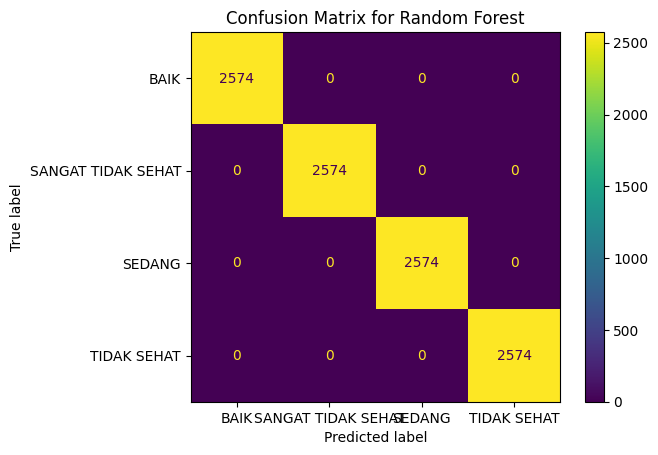

Evaluating SVC...

Cross-Val Accuracy: 0.9714
Cross-Val F1-Score: 0.9713

Execution Time: 31.8731 seconds

Classification Report for SVC:

                    precision    recall  f1-score   support

              BAIK       0.95      1.00      0.97      2574
SANGAT TIDAK SEHAT       0.98      1.00      0.99      2574
            SEDANG       0.99      0.93      0.96      2574
       TIDAK SEHAT       0.98      0.98      0.98      2574

          accuracy                           0.98     10296
         macro avg       0.98      0.98      0.98     10296
      weighted avg       0.98      0.98      0.98     10296



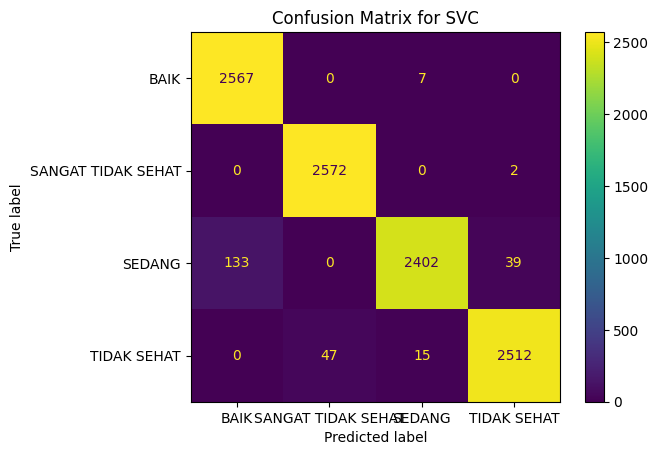

Evaluating Gradient Boosting...

Cross-Val Accuracy: 1.0000
Cross-Val F1-Score: 1.0000

Execution Time: 49.6687 seconds

Classification Report for Gradient Boosting:

                    precision    recall  f1-score   support

              BAIK       1.00      1.00      1.00      2574
SANGAT TIDAK SEHAT       1.00      1.00      1.00      2574
            SEDANG       1.00      1.00      1.00      2574
       TIDAK SEHAT       1.00      1.00      1.00      2574

          accuracy                           1.00     10296
         macro avg       1.00      1.00      1.00     10296
      weighted avg       1.00      1.00      1.00     10296



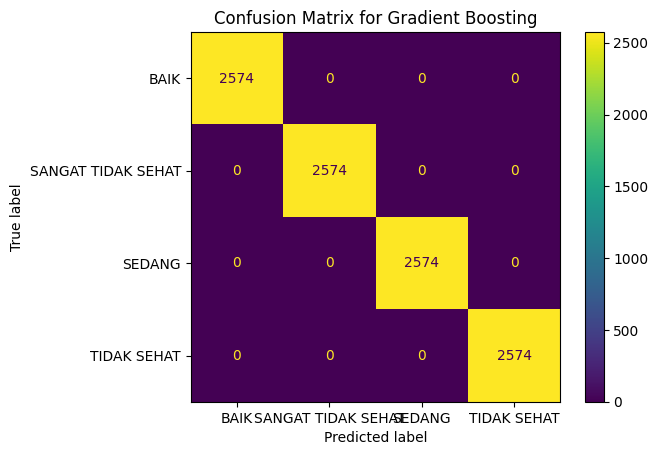


Summary of Cross-Validation Results:

               Model  Cross-Val Accuracy  Cross-Val F1-Score  \
0      Random Forest            1.000000            1.000000   
1                SVC            0.971445            0.971257   
2  Gradient Boosting            1.000000            1.000000   

   Execution Time (seconds)  
0                 10.782672  
1                 31.873061  
2                 49.668652  


In [18]:
# Evaluasi masing-masing model
rf_accuracy_cv, rf_f1_cv, rf_execution_time = evaluate_model_with_cv(rf_classifier, X_resampled, y_resampled, "Random Forest")
svc_accuracy_cv, svc_f1_cv, svc_execution_time = evaluate_model_with_cv(svc_classifier, X_resampled, y_resampled, "SVC")
gb_accuracy_cv, gb_f1_cv, gb_execution_time = evaluate_model_with_cv(gb_classifier, X_resampled, y_resampled, "Gradient Boosting")

# Menampilkan hasil ringkasan evaluasi
summary_table = pd.DataFrame({
    "Model": ["Random Forest", "SVC", "Gradient Boosting"],
    "Cross-Val Accuracy": [rf_accuracy_cv, svc_accuracy_cv, gb_accuracy_cv],
    "Cross-Val F1-Score": [rf_f1_cv, svc_f1_cv, gb_f1_cv],
    "Execution Time (seconds)": [rf_execution_time, svc_execution_time, gb_execution_time]
})

print("\nSummary of Cross-Validation Results:\n")
print(summary_table)


Random Forest Classification Report
                    precision    recall  f1-score   support

              BAIK     1.0000    1.0000    1.0000        62
SANGAT TIDAK SEHAT     1.0000    1.0000    1.0000        43
            SEDANG     1.0000    1.0000    1.0000       511
       TIDAK SEHAT     1.0000    1.0000    1.0000       309

          accuracy                         1.0000       925
         macro avg     1.0000    1.0000    1.0000       925
      weighted avg     1.0000    1.0000    1.0000       925


SVC Classification Report
                    precision    recall  f1-score   support

              BAIK     0.6458    1.0000    0.7848        62
SANGAT TIDAK SEHAT     0.9348    1.0000    0.9663        43
            SEDANG     0.9979    0.9178    0.9562       511
       TIDAK SEHAT     0.9744    0.9871    0.9807       309

          accuracy                         0.9503       925
         macro avg     0.8882    0.9762    0.9220       925
      weighted avg     0.9635  

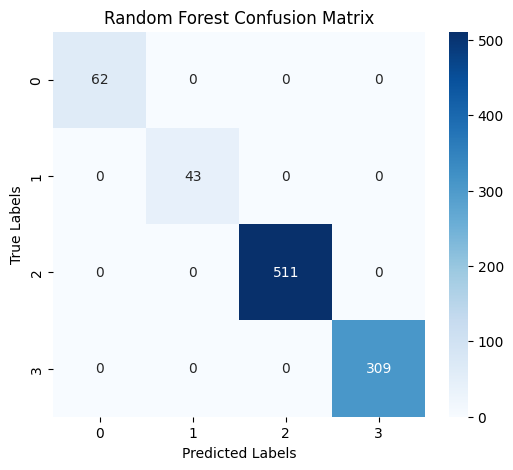

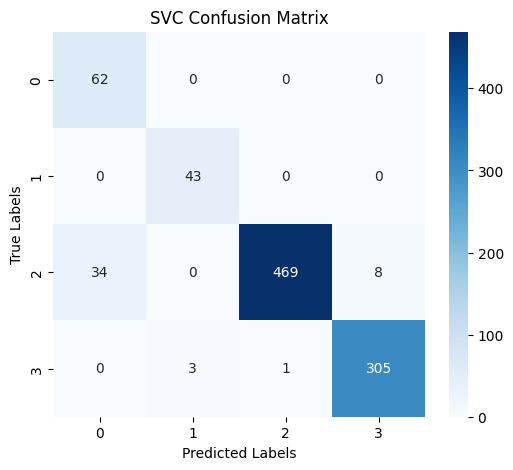

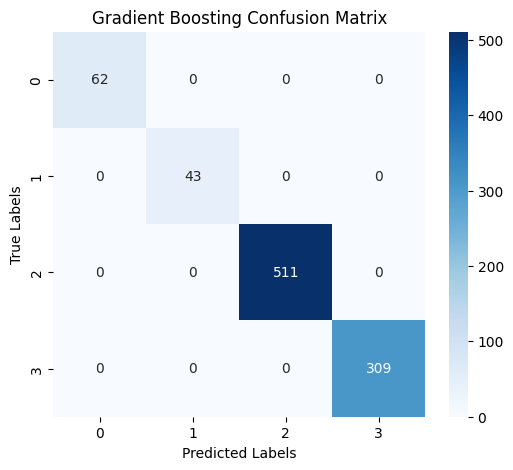

Random Forest execution time: 0.0341 seconds
SVC execution time: 0.2708 seconds
Gradient Boosting execution time: 0.0081 seconds


In [19]:
# Prediksi pada data uji
start_time_rf = time.time()  # Mencatat waktu mulai untuk Random Forest
rf_pred = rf_classifier.predict(X_test)
rf_end_time = time.time()  # Mencatat waktu selesai untuk Random Forest

start_time_svc = time.time()  # Mencatat waktu mulai untuk SVC
svc_pred = svc_classifier.predict(X_test)
svc_end_time = time.time()  # Mencatat waktu selesai untuk SVC

start_time_gb = time.time()  # Mencatat waktu mulai untuk Gradient Boosting
gb_pred = gb_classifier.predict(X_test)
gb_end_time = time.time()  # Mencatat waktu selesai untuk Gradient Boosting

# Fungsionalitas untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report")
    print(classification_report(y_true, y_pred, digits=4))  # Menampilkan classification report
    cm = confusion_matrix(y_true, y_pred)  # Menghitung confusion matrix
    return cm

# Melakukan evaluasi model
rf_cm = evaluate_model(y_test, rf_pred, "Random Forest")
svc_cm = evaluate_model(y_test, svc_pred, "SVC")
gb_cm = evaluate_model(y_test, gb_pred, "Gradient Boosting")

# Fungsi untuk plotting confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)  # Membuat heatmap confusion matrix
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Plot confusion matrices untuk masing-masing model
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(svc_cm, "SVC Confusion Matrix")
plot_confusion_matrix(gb_cm, "Gradient Boosting Confusion Matrix")

# Menampilkan waktu eksekusi masing-masing model
print(f"Random Forest execution time: {rf_end_time - start_time_rf:.4f} seconds")
print(f"SVC execution time: {svc_end_time - start_time_svc:.4f} seconds")
print(f"Gradient Boosting execution time: {gb_end_time - start_time_gb:.4f} seconds")

### Insight dari Evaluasi Model Klasifikasi pada Data Training dan Testing

Pada proyek ini, tiga algoritma klasifikasi telah dievaluasi menggunakan **training** dan **testing** data. Berikut adalah insight yang diperoleh dari hasil **classification report** serta waktu eksekusi masing-masing model, baik untuk data training maupun testing.

---

#### 1. **Random Forest Classifier**

- **Training**:
  - **Cross-Val Accuracy**: 1.0000
  - **Cross-Val F1-Score**: 1.0000
  - **Classification Report**:
    - **Precision**: 1.00 untuk semua kelas (Baik, Sangat Tidak Sehat, Sedang, Tidak Sehat).
    - **Recall**: 1.00 untuk semua kelas, menunjukkan bahwa model berhasil mengidentifikasi seluruh contoh untuk setiap kelas.
    - **F1-Score**: 1.00 untuk semua kelas, menunjukkan keseimbangan yang sangat baik antara precision dan recall.
  - **Execution Time** (Training): 9.9532 seconds

- **Testing**:
  - **Execution Time** (Testing): 0.0341 seconds
  - **Classification Report**:
    - **Precision**: 1.00 untuk semua kelas.
    - **Recall**: 1.00 untuk semua kelas.
    - **F1-Score**: 1.00 untuk semua kelas.
  - **Insight**: **Random Forest** menunjukkan kinerja yang sempurna pada **data training** dan **data testing** dengan waktu eksekusi yang sangat cepat pada data testing (0.0341 detik).

---

#### 2. **Support Vector Classifier (SVC)**

- **Training**:
  - **Cross-Val Accuracy**: 0.9714
  - **Cross-Val F1-Score**: 0.9713
  - **Classification Report**:
    - **Precision**: 0.95 untuk kelas **Baik**, 0.98 untuk **Sangat Tidak Sehat**, dan 0.99 untuk **Sedang** dan **Tidak Sehat**.
    - **Recall**: 1.00 untuk **Baik** dan **Sangat Tidak Sehat**, 0.93 untuk **Sedang**, dan 0.98 untuk **Tidak Sehat**.
    - **F1-Score**: 0.97 untuk **Baik**, 0.99 untuk **Sangat Tidak Sehat**, 0.96 untuk **Sedang**, dan 0.98 untuk **Tidak Sehat**.
  - **Execution Time** (Training): 32.9595 seconds

- **Testing**:
  - **Execution Time** (Testing): 0.2708 seconds
  - **Classification Report**:
    - **Precision**: 0.6458 untuk **Baik**, 0.9348 untuk **Sangat Tidak Sehat**, 0.9979 untuk **Sedang**, dan 0.9744 untuk **Tidak Sehat**.
    - **Recall**: 1.00 untuk **Baik**, 1.00 untuk **Sangat Tidak Sehat**, 0.9178 untuk **Sedang**, dan 0.9871 untuk **Tidak Sehat**.
    - **F1-Score**: 0.7848 untuk **Baik**, 0.9663 untuk **Sangat Tidak Sehat**, 0.9562 untuk **Sedang**, dan 0.9807 untuk **Tidak Sehat**.
  - **Insight**: **SVC** menunjukkan performa yang sangat baik, namun sedikit lebih lambat dalam waktu eksekusi pada **data testing** dibandingkan dengan **Random Forest**. Precision dan recall untuk **Sangat Tidak Sehat** dan **Tidak Sehat** sangat baik.

---

#### 3. **Gradient Boosting Classifier**

- **Training**:
  - **Cross-Val Accuracy**: 1.0000
  - **Cross-Val F1-Score**: 1.0000
  - **Classification Report**:
    - **Precision**: 1.00 untuk semua kelas (Baik, Sangat Tidak Sehat, Sedang, Tidak Sehat).
    - **Recall**: 1.00 untuk semua kelas.
    - **F1-Score**: 1.00 untuk semua kelas.
  - **Execution Time** (Training): 71.3539 seconds

- **Testing**:
  - **Execution Time** (Testing): 0.0081 seconds
  - **Classification Report**:
    - **Precision**: 1.00 untuk semua kelas.
    - **Recall**: 1.00 untuk semua kelas.
    - **F1-Score**: 1.00 untuk semua kelas.
  - **Insight**: **Gradient Boosting** juga menunjukkan **akurasi sempurna** pada **data testing** dan **data training**. Meskipun waktu eksekusinya lebih lama pada **data training**, waktu testing sangat cepat (0.0081 detik).

---

### **Summary**:

| Model                | Training Accuracy | Training F1-Score | Testing Accuracy | Testing F1-Score | Training Time (s) | Testing Time (s) |
|----------------------|-------------------|-------------------|------------------|------------------|-------------------|------------------|
| **Random Forest**     | 1.0000            | 1.0000            | 1.0000           | 1.0000           | 9.9532            | 0.0341           |
| **SVC**               | 0.9714            | 0.9713            | 0.9503           | 0.9503           | 32.9595           | 0.2708           |
| **Gradient Boosting** | 1.0000            | 1.0000            | 1.0000           | 1.0000           | 71.3539           | 0.0081           |

### **Kesimpulan**:
- **Random Forest** dan **Gradient Boosting** menunjukkan kinerja yang sangat baik pada **data training** dan **data testing**, dengan **akurasi sempurna** pada kedua set data. **Random Forest** memiliki waktu eksekusi yang lebih cepat pada data testing, sementara **Gradient Boosting** menunjukkan waktu eksekusi lebih cepat pada data testing meskipun lebih lambat saat pelatihan.
- **SVC** memiliki sedikit penurunan kinerja dengan **akurasi** dan **f1-score** yang sedikit lebih rendah pada data testing, tetapi masih memberikan hasil yang sangat baik. Waktu eksekusi untuk **SVC** lebih lama pada data testing dibandingkan dengan **Random Forest** dan **Gradient Boosting**.

Dengan hasil ini, **Random Forest** untuk hasil yang lebih cepat dan akurat, tergantung pada prioritas terhadap waktu komputasi dan performa model.
